In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns  

In [2]:
df = pd.read_csv(filepath_or_buffer="../DATA/bank-full.csv")

In [3]:
df.info()
# No missing entries 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
df.head().transpose()

,0,1,2,3,4
age,56,57,37,40,56
job,housemaid,services,services,admin.,services
marital,married,married,married,married,married
education,basic.4y,high.school,high.school,basic.6y,high.school
default,no,unknown,no,no,no
housing,no,no,yes,no,no
loan,no,no,no,no,yes
contact,telephone,telephone,telephone,telephone,telephone
month,may,may,may,may,may
day_of_week,mon,mon,mon,mon,mon


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


<Axes: xlabel='age', ylabel='Count'>

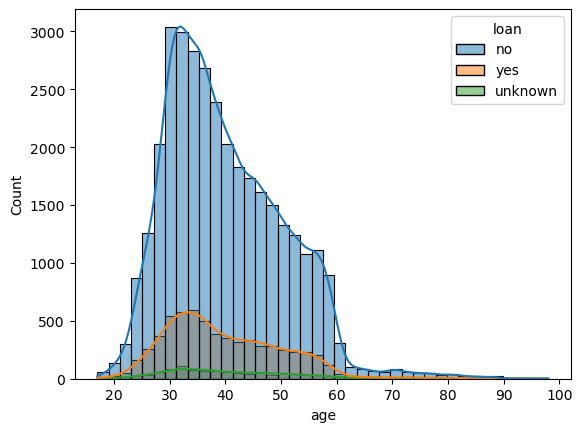

In [6]:
sns.histplot(data=df, x='age', kde=True, bins=40, hue='loan')

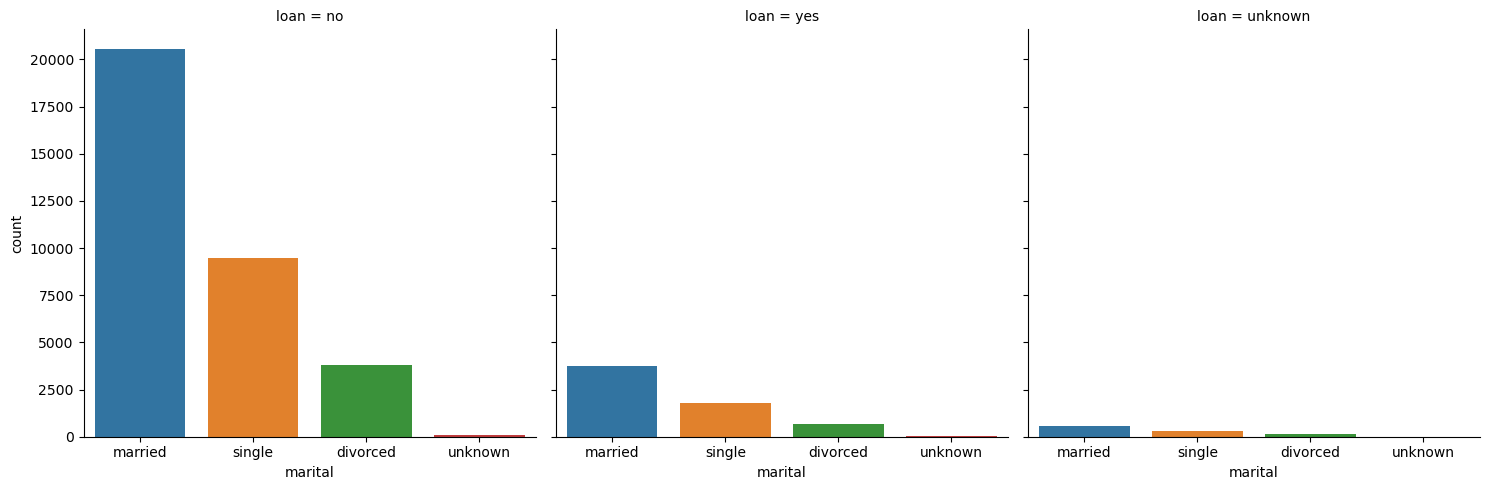

In [7]:
sns.catplot(data=df, col='loan', x='marital', kind='count')

<Axes: xlabel='pdays', ylabel='Count'>

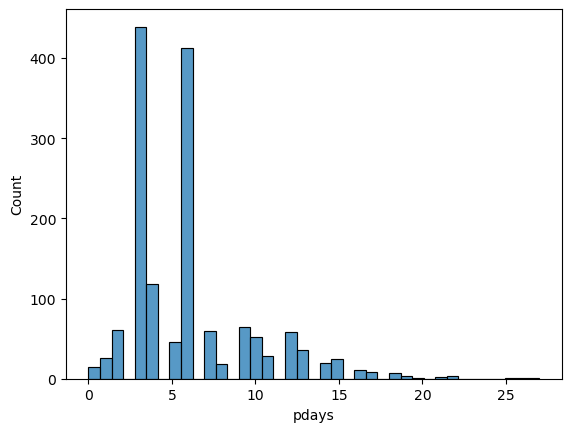

In [8]:
sns.histplot(data=df[df['pdays'] != 999], x='pdays')

(0.0, 1000.0)

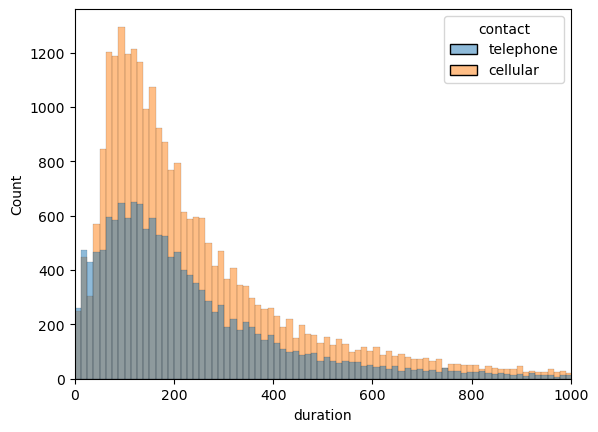

In [9]:
sns.histplot(data=df, x='duration' , hue='contact' )
plt.xlim(0,1000)

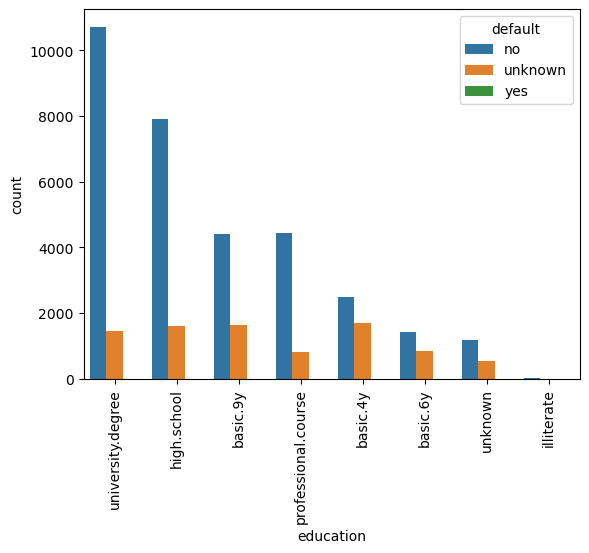

In [10]:
sns.countplot(data=df, x='education', order=df['education'].value_counts().index, hue='default')
plt.xticks(rotation=90); 

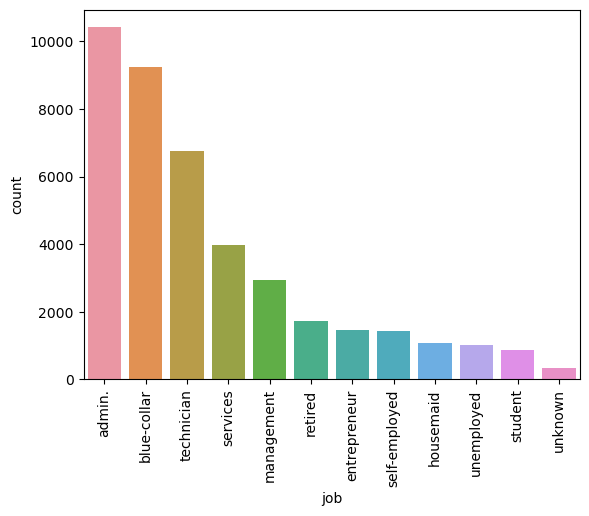

In [11]:
sns.countplot(data=df, x='job', order=df['job'].value_counts().index)
plt.xticks(rotation=90);

In [12]:
df_dummy = pd.get_dummies(df)

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_d = scaler.fit_transform(df_dummy)

In [32]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=2, n_init='auto')


In [33]:
y_hat = model.fit_predict(df_d)

In [34]:
y_hat

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [35]:
# Joined Cluster
df_dummy['Cluster'] = y_hat

<Axes: >

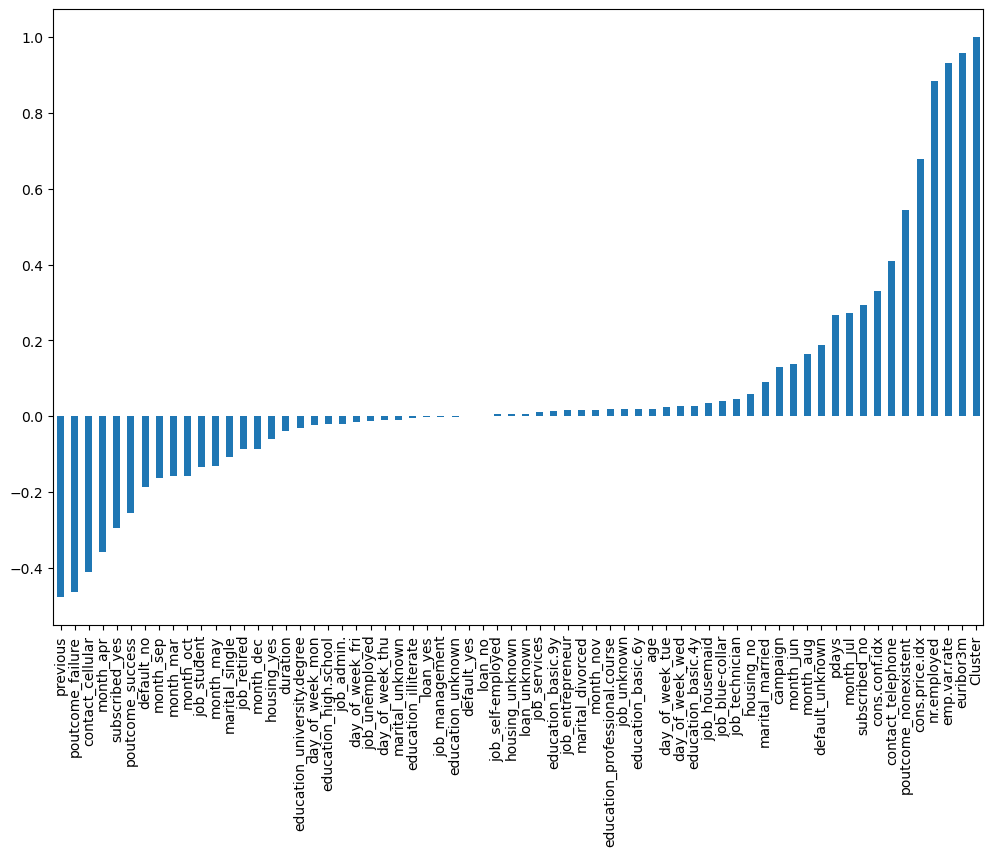

In [38]:
plt.figure(figsize=(12,8))
df_dummy.corr()['Cluster'].sort_values().plot(kind='bar')

In [50]:
ssd = []


for k in np.arange(2,10):
    model = KMeans(n_clusters=k, n_init='auto')
    model.fit(df_d)
    ssd.append(model.inertia_)

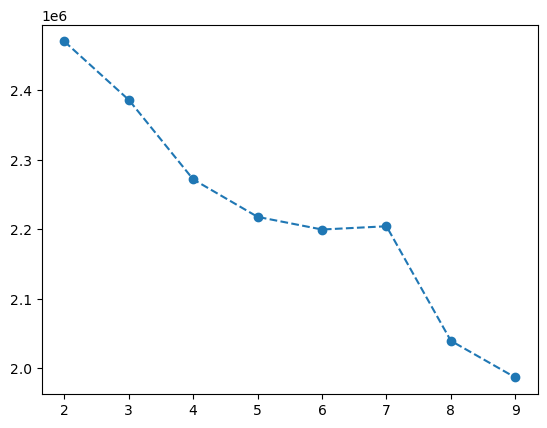

In [59]:
plt.plot(np.arange(2,10), ssd, ls='--', marker='o')